In [102]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [103]:
parcellation_file = '/Users/jk1/temp/fmri_test/parcellations/ward_parcellation_k500.nii.gz'
threshold_size = 650

parcel_dir = os.path.dirname(parcellation_file)
parcellation_file_name = os.path.basename(parcellation_file)

In [104]:
p_img = nib.load(parcellation_file)
p_data = p_img.get_fdata()

# get rid of parcel 0 by assigning it to 1
filtered_p_data = p_data + 1

In [105]:
unique, counts = np.unique(filtered_p_data, return_counts=True)
parcel_size = dict(zip(unique, counts))

[]

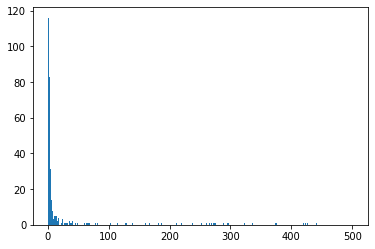

In [106]:
plt.hist(counts, unique)
plt.plot()

In [107]:
sum(counts < threshold_size)

448

In [108]:
np.percentile(counts, 90)

664.0

In [109]:
# assign all small parcels to 0
for parcel, size in parcel_size.items():
    if size < threshold_size:
        filtered_p_data[filtered_p_data == parcel] = 0



In [110]:
np.unique(filtered_p_data).size

54

In [111]:
coordinate_space = p_img.affine
image_extension = '.nii'
# MATLAB can not open NIFTI saved as int, thus float is necessary
filtered_parcellation = nib.Nifti1Image(filtered_p_data.astype('float64'), affine=coordinate_space)
nib.save(filtered_parcellation, os.path.join(parcel_dir, f'filtered_min{threshold_size}_' + parcellation_file_name))